In [1]:
import numpy as np
import pandas as pd

In [2]:
data_loc = '../dades/'

In [3]:
accions_salvament = pd.read_csv(data_loc+'Actuacions_en_salvaments_al_medi_natural_dels_Bombers_de_la_Generalitat_20231109.csv')
accions_filtrades= accions_salvament[(accions_salvament["ANY"]<2023) & (accions_salvament["ANY"]>2017)]   #AND & OR |

# show loaded table:
accions_filtrades

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
1794,220317846,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25089,Farrera,Montesclado,26,...,2022,12,31/12/2022,359029.0,4703443.0,3,S,1.285146,42.470508,POINT (1.285146163115 42.47050799814)
1795,220424995,Tarragona,SV,salvaments,MU,Salvament i/o rescat de muntanya,43049,Cornudella de Montsant,Siurana,29,...,2022,12,31/12/2022,326877.0,4569430.0,4,S,0.933488,41.257753,POINT (0.933487648042 41.257752634189)
1796,222433564,Metropolitana Sud,SV,salvaments,MU,Salvament i/o rescat de muntanya,8270,Sitges,Sitges,17,...,2022,12,31/12/2022,396692.0,4564042.0,24,S,1.767511,41.221172,POINT (1.767511104528 41.221172153671)
1797,222703229,U.F. Val d'Aran,SV,salvaments,MU,Salvament i/o rescat de muntanya,25025,Naut Aran,Naut Aran,39,...,2022,12,31/12/2022,335546.0,4726173.0,27,S,0.993092,42.670455,POINT (0.993092440136 42.670455109079)
1798,222318655,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,17006,Alp,Alp,15,...,2022,12,31/12/2022,409042.0,4687406.0,23,S,1.895928,42.333593,POINT (1.895928288604 42.333593201755)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,182600035,Terres de l'Ebre,SV,salvaments,MU,Rescat de muntanya,43136,Sant Carles de la Ràpita,Sant Carles de la Ràpita,22,...,2018,1,02/01/2018,292357.0,4500888.0,26,SI,0.544737,40.632747,NaN
10233,182500044,Metropolitana Nord,SV,salvaments,MR,Recerca i/o rescat en medi marítim,8121,Mataró,Mataró,21,...,2018,1,01/01/2018,454218.0,4597542.0,25,SI,2.451231,41.528215,NaN
10234,180200036,Girona,SV,salvaments,MU,Rescat de muntanya,17032,Cadaqués,Cadaqués,2,...,2018,1,01/01/2018,524808.0,4684559.0,2,SI,3.301029,42.312873,NaN
10235,182500054,Metropolitana Nord,SV,salvaments,RC,Recerca persones perdudes,8120,Matadepera,Matadepera,40,...,2018,1,01/01/2018,418314.0,4610776.0,25,SI,2.019110,41.644542,NaN


In [4]:
trucades_salvament= pd.read_csv(data_loc + 'Dades_d_incidents_operatius_gestionats_pel_CAT112_20231110.csv' )
trucades_filtrades= trucades_salvament[(trucades_salvament["ANY"]<2023) & (trucades_salvament["ANY"]>2017)]

df= trucades_filtrades.sort_values(by="TIPUS",ascending=True)

# show loaded table:
df_meteo = df[trucades_filtrades["TIPUS"] == "Meteorologia"]
df_meteo

C:\Users\Imma\AppData\Local\Temp\ipykernel_11232\2761872896.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_meteo = df[trucades_filtrades["TIPUS"] == "Meteorologia"]


,ANY,MES,PROVINCIA,COMARCA,MUNICIPI,TIPUS,INCIDENTS
302143,2018,4,BARCELONA,MARESME,PINEDA DE MAR,Meteorologia,1
315062,2018,1,BARCELONA,BAIX LLOBREGAT,GAVA,Meteorologia,5
226851,2019,9,BARCELONA,MARESME,CALELLA,Meteorologia,1
257179,2019,2,TARRAGONA,MONTSIA,AMPOSTA,Meteorologia,4
67570,2022,9,BARCELONA,ANOIA,MASQUEFA,Meteorologia,2
...,...,...,...,...,...,...,...
305557,2018,3,BARCELONA,OSONA,MUNTANYOLA,Meteorologia,1
305574,2018,3,BARCELONA,MARESME,MALGRAT DE MAR,Meteorologia,3
175860,2020,9,BARCELONA,GARRAF,SITGES,Meteorologia,5
132458,2021,7,GIRONA,SELVA,MASSANES,Meteorologia,1


In [5]:
df_meteo[['ANY','MES']].drop_duplicates().shape[0]

60

In [6]:
# Ajuntem mes i any per fer el plot
df_meteo['ANY-MES'] = pd.to_datetime(df['ANY'].astype(str) + '-' + df['MES'].astype(str), format='%Y-%m')

df_meteo.pop('COMARCA')
df_meteo.pop("TIPUS")
df_meteo.pop("MUNICIPI")
df_meteo.pop("ANY")
df_meteo.pop("MES")

df_meteo

C:\Users\Imma\AppData\Local\Temp\ipykernel_11232\1204944479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo['ANY-MES'] = pd.to_datetime(df['ANY'].astype(str) + '.' + df['MES'].astype(str), format='%Y.%m')


,PROVINCIA,INCIDENTS,ANY-MES
302143,BARCELONA,1,2018-04-01
315062,BARCELONA,5,2018-01-01
226851,BARCELONA,1,2019-09-01
257179,TARRAGONA,4,2019-02-01
67570,BARCELONA,2,2022-09-01
...,...,...,...
305557,BARCELONA,1,2018-03-01
305574,BARCELONA,3,2018-03-01
175860,BARCELONA,5,2020-09-01
132458,GIRONA,1,2021-07-01


In [7]:
#Plot de incidents per mes i any per tipus
new_order=['ANY-MES','INCIDENTS','PROVINCIA']

df_meteo=df_meteo[new_order]

#df_meteo.set_index('ANY-MES', inplace=True)

df_meteo

,ANY-MES,INCIDENTS,PROVINCIA
302143,2018-04-01,1,BARCELONA
315062,2018-01-01,5,BARCELONA
226851,2019-09-01,1,BARCELONA
257179,2019-02-01,4,TARRAGONA
67570,2022-09-01,2,BARCELONA
...,...,...,...
305557,2018-03-01,1,BARCELONA
305574,2018-03-01,3,BARCELONA
175860,2020-09-01,5,BARCELONA
132458,2021-07-01,1,GIRONA


In [9]:
df_meteo

,ANY-MES,INCIDENTS,PROVINCIA
302143,2018-04-01,1,BARCELONA
315062,2018-01-01,5,BARCELONA
226851,2019-09-01,1,BARCELONA
257179,2019-02-01,4,TARRAGONA
67570,2022-09-01,2,BARCELONA
...,...,...,...
305557,2018-03-01,1,BARCELONA
305574,2018-03-01,3,BARCELONA
175860,2020-09-01,5,BARCELONA
132458,2021-07-01,1,GIRONA


In [10]:
df_meteo

,ANY-MES,INCIDENTS,PROVINCIA
302143,2018-04-01,1,BARCELONA
315062,2018-01-01,5,BARCELONA
226851,2019-09-01,1,BARCELONA
257179,2019-02-01,4,TARRAGONA
67570,2022-09-01,2,BARCELONA
...,...,...,...
305557,2018-03-01,1,BARCELONA
305574,2018-03-01,3,BARCELONA
175860,2020-09-01,5,BARCELONA
132458,2021-07-01,1,GIRONA


In [11]:
df_meteo_grouped = pd.DataFrame(df_meteo.groupby(['ANY-MES','PROVINCIA'])['INCIDENTS'].sum())
df_meteo_grouped = df_meteo_grouped.reset_index()
df_meteo_grouped

,ANY-MES,PROVINCIA,INCIDENTS
0,2018-01-01,BARCELONA,336
1,2018-01-01,GIRONA,23
2,2018-01-01,LLEIDA,7
3,2018-01-01,TARRAGONA,81
4,2018-02-01,BARCELONA,69
...,...,...,...
229,2022-11-01,TARRAGONA,81
230,2022-12-01,BARCELONA,14
231,2022-12-01,GIRONA,3
232,2022-12-01,LLEIDA,4


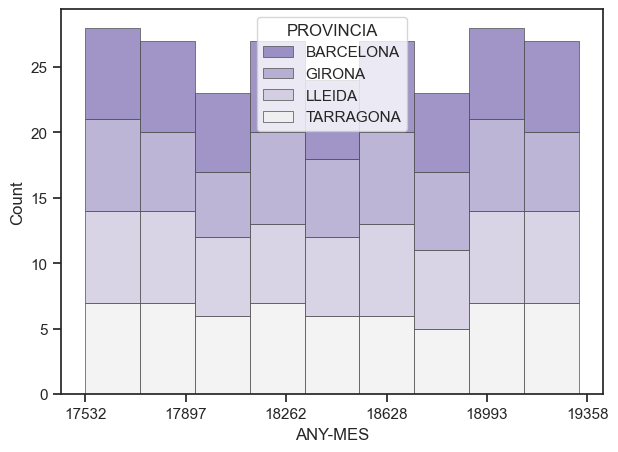

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    df_meteo_grouped,
    x="ANY-MES", hue="PROVINCIA",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())




AttributeError: 'Axes' object has no attribute 'get_ticks'

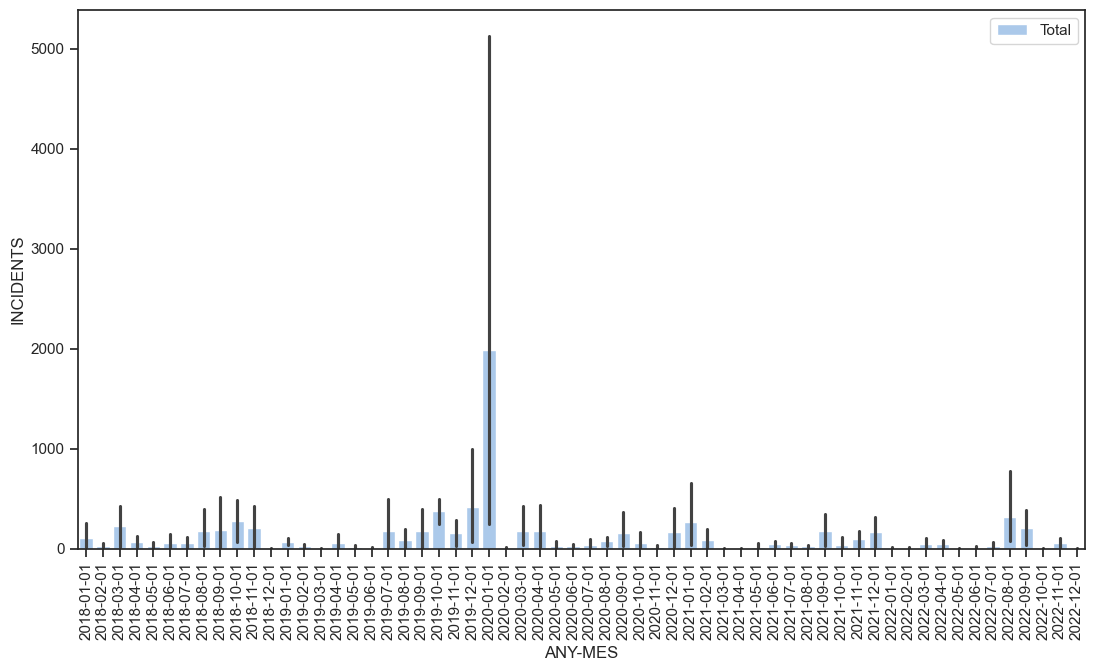

In [17]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(13, 7))
sns.despine(f)

sns.set_color_codes("pastel")
sns.barplot(x="ANY-MES", y="INCIDENTS", data=df_meteo_grouped, #hue="PROVINCIA",
            label="Total", color="b")

plt.xticks(rotation=90)
xticks_selected = ax.get_ticks()[::5]
ax.set_xticks(xticks_selected)

plt.show()